Import the data in a dataframe

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../../data/raw/ResectMap_DATA_2023-11-13_2306.csv")
# Dataframe with basic information per patient
df_mrn = df[df["mrn"].notna()]
# Dataframe with Engel outcomes
df_engel = df[df["redcap_repeat_instrument"] == "engel_outcomes"]

In [22]:
# Print the number of participants
print("Number of participants in the main df:", df["record_id"].nunique())
print("Number of participants in the MRN df:", df_mrn["record_id"].nunique())
print("Same as number of row ?", df_mrn["record_id"].nunique()==len(df_mrn))
print("Number of participants in the Engel df:", df_engel["record_id"].nunique())
print("Same as number of row ?", df_engel["record_id"].nunique()==len(df_engel))

Number of participants in the main df: 677
Number of participants in the MRN df: 677
Same as number of row ? True
Number of participants in the Engel df: 677
Same as number of row ? False


Plotting the age distribution of the data

In [54]:
print("Minimum age:", df_mrn["age"].min(), "\nMaximum age:", df_mrn["age"].max())

Minimum age: 2.0 
Maximum age: 84.0


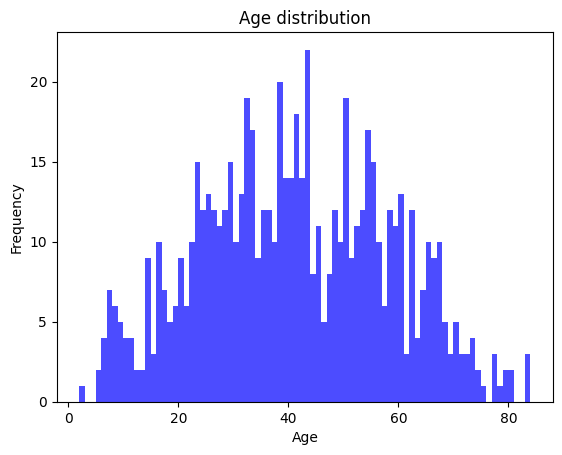

In [60]:
# Create a histogram
plt.hist(df_mrn["age"], bins=82, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution')

# Show the plot
plt.show()

Showing the sex distribution of the data

In [ ]:
# Before, 1 represented female and 2 represented male
# Now, 0 represents female and 1 represents male
df_mrn["sex_gender"] = df_mrn["sex_gender"].map({1: 0, 2: 1})

# Define a mapping dictionary
gender_mapping = {0: 'female', 1: 'male'} 

# Count the number of males and females in the dataset
df_mrn["sex_gender"].replace(gender_mapping).value_counts()

In [24]:
# Print patients with multiple Engel outcomes
df_engel[df_engel['record_id'].duplicated()]

,record_id,redcap_repeat_instrument,redcap_repeat_instance,mrn,study_site,study_site_other,ny_num_yn,ny_num,other_study_ids,inc_crit,...,cshq_nw_z,cshq_para_raw,cshq_para_z,cshq_breath_raw,cshq_breath_z,cshq_ds_raw,cshq_ds_z,cshq_total_raw,cshq_total_z,neuropsychological_testing_complete
2043,RSCT041607,engel_outcomes,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2044,RSCT041607,engel_outcomes,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2814,RSCT058378,engel_outcomes,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3117,RSCT064938,engel_outcomes,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3259,RSCT066862,engel_outcomes,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4412,RSCT091205,engel_outcomes,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Plot the distribution of Engel outcomes

In [65]:
# Create 1 column out of the 4 dummy variables for engel outcome
df_engel['surg_engel'] = df_engel[['surg_engel___1', 'surg_engel___2', 'surg_engel___3', 'surg_engel___4']].idxmax(axis=1).str.split('___').str[1].astype(int)
df_engel[["record_id", "surg_engel"]].head()

c:\Tools\Python_3.7.2\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,record_id,surg_engel
9,RSCT000111,2
26,RSCT000208,3
35,RSCT000277,4
40,RSCT000508,1
48,RSCT000749,2


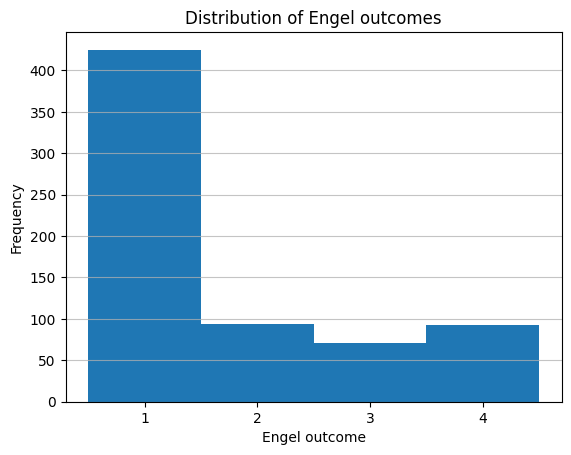

In [63]:
# Create a histogram of the 'surg_engel' variable
plt.hist(df_engel['surg_engel'], bins=[1, 2, 3, 4, 5])  # Specify the bin edges

# Customize x-axis ticks and labels
bin_centers = [1.5, 2.5, 3.5, 4.5]
plt.xticks(bin_centers, ['1', '2', '3', '4'])

# Add labels and title
plt.xlabel('Engel outcome')
plt.ylabel('Frequency')
plt.title('Distribution of Engel outcomes')

# Add grid for better readability
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()